In [147]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [148]:
df = pd.read_csv("report.csv")

In [149]:
df.head()

,experiment_name,experiment_iteration,task_number,code_fix_count,code_syntax_status,obj_expected,obj_given,obj_status,sum_prompt_tokens,sum_completion_tokens,sum_prompt_tokens_price,sum_completion_tokens_price,sum_price
0,experiment_11,1,1,0,True,78.64,78.637602,True,672,340,0.000101,0.000204,0.000305
1,experiment_11,1,2,0,True,15.00,15.000000,True,420,197,0.000063,0.000118,0.000181
2,experiment_11,1,3,0,True,12000.00,12000.000000,True,650,295,0.000097,0.000177,0.000275
3,experiment_11,1,4,0,True,7.37,7.370370,True,631,401,0.000095,0.000241,0.000335
4,experiment_11,1,5,0,True,240.90,240.900000,True,964,533,0.000145,0.000320,0.000464


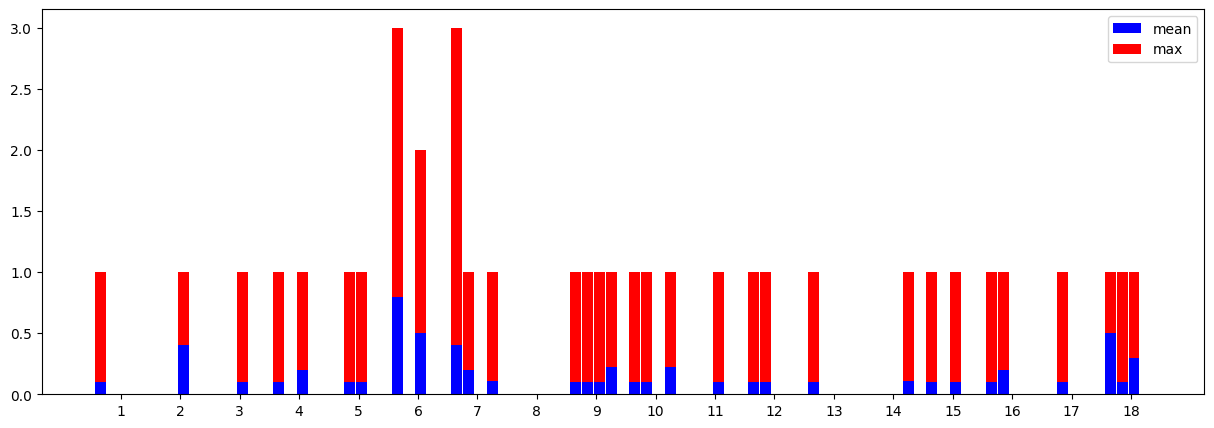

In [156]:
tasks = df["task_number"].unique()

width = 0.2
fig, ax = plt.subplots(figsize=(15, 5))
bottom = np.zeros(18)

for i, experiment in enumerate(df.experiment_name.unique()):
    mean_code_fix_count = df.groupby(["experiment_name", "task_number"])["code_fix_count"].mean().unstack()
    mean_code_fix_count = mean_code_fix_count.loc[experiment]
    max_code_fix_count = df.groupby(["experiment_name", "task_number"])["code_fix_count"].max().unstack()
    max_code_fix_count = max_code_fix_count.loc[experiment]

    ax.bar(tasks + i * width, mean_code_fix_count.values, width - 0.015, label="mean", bottom=np.zeros(18),
           color="blue")
    ax.bar(tasks + i * width, max_code_fix_count.values - mean_code_fix_count.values, width - 0.015, label="max",
           bottom=mean_code_fix_count.values, color="red")

ax.legend(['mean', 'max'])
ax.set_xticks(tasks + width + 0.15, tasks)
plt.show()

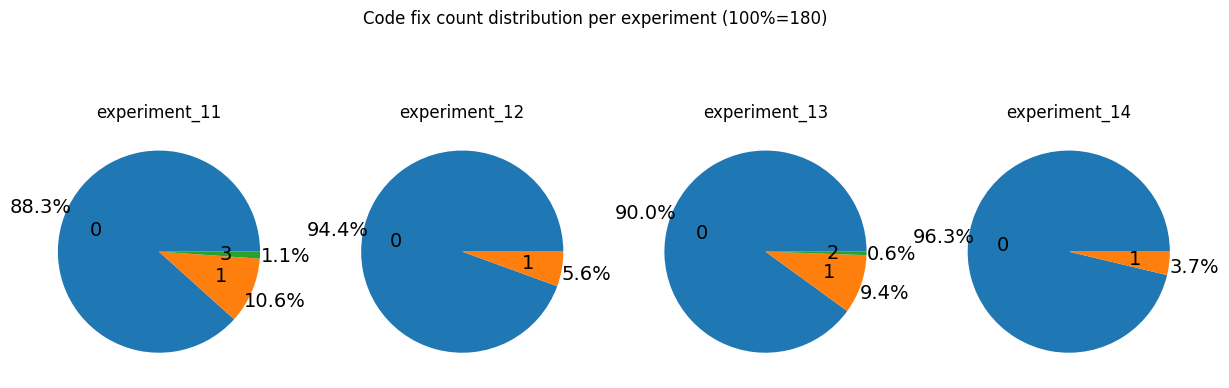

In [161]:
tasks = df["task_number"].unique()

width = 0.3
fig, ax = plt.subplots(1, 4, figsize=(15, 5))

for i, experiment in enumerate(df.experiment_name.unique()):
    code_fix_count_per_experiment = df[df.experiment_name == experiment]
    # count values of code_fix_count
    code_fix_count_per_experiment.value_counts("code_fix_count")
    ax[i].pie(code_fix_count_per_experiment.value_counts("code_fix_count").values,
              labels=code_fix_count_per_experiment.value_counts("code_fix_count").index,
              autopct='%1.1f%%',
              pctdistance=1.25,
              labeldistance=.6,
              )
    # increase size of text in pie chart
    [t.set_fontsize(14) for t in ax[i].texts]
    # add labels
    ax[i].set_title(experiment)
    
# title of the whole figure
fig.suptitle("Code fix count distribution per experiment (100%=180)")

plt.show()


In [162]:
# experiment_11 = df[df.experiment_name == "experiment_11"]
experiment_11_efficiency = df.groupby(["experiment_name","experiment_iteration"])["code_syntax_status"].sum() / 18 * 100
# experiment_11_efficiency = df.groupby(["experiment_name"])["code_syntax_status"].sum() / 180 * 100
experiment_11_efficiency

experiment_name  experiment_iteration
experiment_11    1                       100.000000
                 2                       100.000000
                 3                       100.000000
                 4                       100.000000
                 5                       100.000000
                 6                       100.000000
                 7                       100.000000
                 8                       100.000000
                 9                       100.000000
                 10                       94.444444
experiment_12    1                       100.000000
                 2                       100.000000
                 3                       100.000000
                 4                       100.000000
                 5                       100.000000
                 6                       100.000000
                 7                       100.000000
                 8                       100.000000
                 9        

In [163]:

# calculate mean from experiment_11_efficiency based on experiment name
experiment_11_efficiency = experiment_11_efficiency.groupby("experiment_name").mean()
experiment_11_efficiency

experiment_name
experiment_11     99.444444
experiment_12    100.000000
experiment_13    100.000000
experiment_14     99.382716
Name: code_syntax_status, dtype: float64

In [164]:
experiment_11_cost = df.groupby(["experiment_name","experiment_iteration"])["sum_price"].sum()
experiment_11_cost

experiment_name  experiment_iteration
experiment_11    1                       0.005624
                 2                       0.005640
                 3                       0.005971
                 4                       0.006873
                 5                       0.006313
                 6                       0.006961
                 7                       0.006293
                 8                       0.007309
                 9                       0.006791
                 10                      0.007520
experiment_12    1                       0.093720
                 2                       0.094427
                 3                       0.093497
                 4                       0.093511
                 5                       0.092742
                 6                       0.093961
                 7                       0.093645
                 8                       0.090007
                 9                       0.090578
            

In [165]:
experiment_11_cost = experiment_11_cost.groupby("experiment_name").mean()
experiment_11_cost

experiment_name
experiment_11    0.006530
experiment_12    0.092936
experiment_13    0.016046
experiment_14    0.094846
Name: sum_price, dtype: float64

In [166]:
# in padas dataframe merge based on experiment name experiment_11_cost to experiment_11_efficiency
experiment_11 = pd.merge(experiment_11_efficiency, experiment_11_cost, on="experiment_name")
experiment_11

,code_syntax_status,sum_price
experiment_name,,
experiment_11,99.444444,0.006530
experiment_12,100.000000,0.092936
experiment_13,100.000000,0.016046
experiment_14,99.382716,0.094846


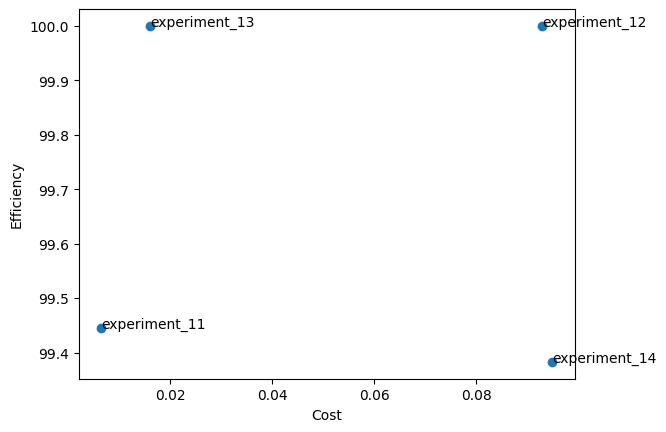

In [167]:
# based on experiment_11  create dot chart with efficiency and cost. set cost on x axis and efficiency on y axis
fig, ax = plt.subplots()
ax.scatter(experiment_11["sum_price"], experiment_11["code_syntax_status"])
ax.set_xlabel("Cost")
ax.set_ylabel("Efficiency")
# add labels to dots
for i, txt in enumerate(experiment_11.index):
    ax.annotate(txt, (experiment_11["sum_price"][i], experiment_11["code_syntax_status"][i]))

plt.show()
